In [1]:
from typing import List, Optional, Tuple, Union

import matplotlib as mpl
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import pandas as pd

import utils as u
from models import pentzer2014pow
from steps import preprocess
from visualization import papermode

papermode(plt, size=18)


In [2]:
def abbrange(letter: str, a: int, b: int) -> Tuple[str]:
    return (f"{letter}{i:02}" for i in range(a, b))


In [3]:
abbrs = tuple(abbrange("H", 1, 37))
colors = u.COLORS
cols = {a: colors[u.get_terrain(a)] for a in abbrs}

# highlighted_abbrs = ("M03", "M04", "M05", "M06")
# highlighted_abbrs = ("S23",)


def add_terrain_legend(mpl_elem: Union[mpl.axes.Axes, mpl.figure.Figure], highlighted: Optional[List[str]] = None):
    legend_handles = [mpatches.Patch(color=col, label=lab) for lab, col in colors.items()]
    if highlighted is not None:
        legend_handles.extend([mpatches.Patch(color="xkcd:bright red", label=lab) for lab in highlighted])
    # mpl_elem.legend(handles=legend_handles, bbox_to_anchor=(1.05, 0), loc="lower left")
    mpl_elem.legend(
        handles=legend_handles, ncol=len(colors), bbox_to_anchor=(0.5, -0.03), loc="upper center", title="Terrain"
    )


In [4]:
dfs = {}
for abbr in abbrs:
    preprocess(abbr, verbose=False)
    pentz_df = pentzer2014pow.pentzer2014pow(abbr, verbose=False);
    dfs[abbr] = pentz_df


H36: 100%|██████████| 267/267 [00:00<00:00, 3079.61it/s]


In [5]:
model_name = pentzer2014pow.__MODEL_NAME__.lower()
figdir = u.get_figdir("summary", subdir=model_name)
model_name = pentzer2014pow.__MODEL_NAME__.title()


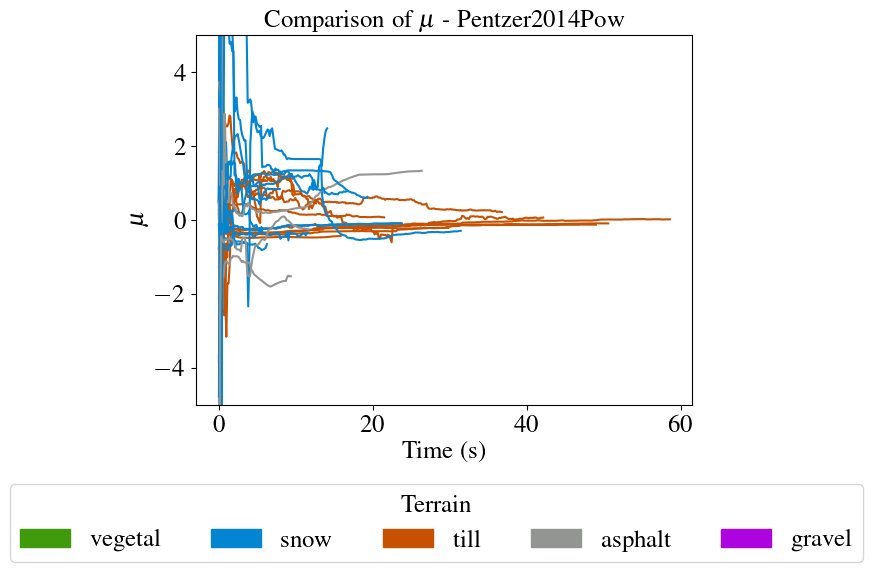

In [6]:
fig, ax = plt.subplots()

for abbr in abbrs:
    col = cols[abbr]
    ax.plot(dfs[abbr].time_rel, dfs[abbr].m_sym, col, label=abbr)
add_terrain_legend(fig)
ax.set_ylim(-5,5)
ax.set_xlabel("Time (s)")
ax.set_ylabel("$\mu$")
ax.set_title(f"Comparison of $\mu$ - {model_name}")

for ext in u.EXTS:
    fig.savefig(figdir / f"{model_name}_mu.{ext}", bbox_inches="tight")


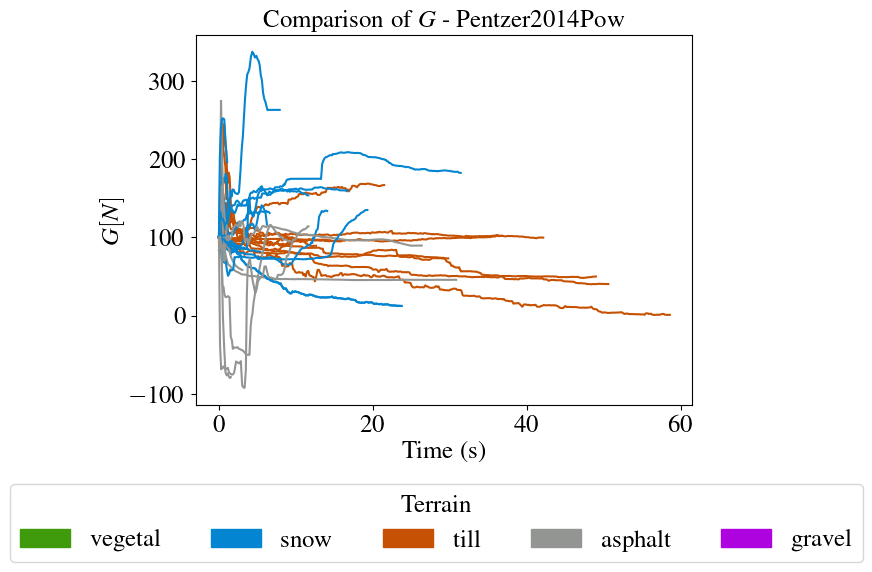

In [7]:
fig, ax = plt.subplots()

for abbr in abbrs:
    col = cols[abbr]
    ax.plot(dfs[abbr].time_rel, dfs[abbr].G_sym, col, label=abbr)
add_terrain_legend(fig)
ax.set_xlabel("Time (s)")
ax.set_ylabel("$G [N]$")
ax.set_title(f"Comparison of $G$ - {model_name}")

for ext in u.EXTS:
    fig.savefig(figdir / f"{model_name}_G.{ext}", bbox_inches="tight")

KeyError: 'M03'

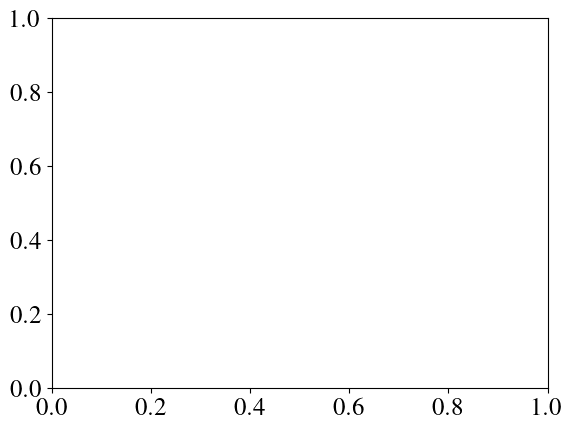

In [8]:
fig, ax = plt.subplots()

rot_abbrs = ("M03", "M04", "M05", "M06")
highlighted_abbrs = ("S23,")

for abbr in rot_abbrs:
    col = cols[abbr]
    col = "r" if abbr in highlighted_abbrs else col
    ax.plot(dfs[abbr].time_rel, dfs[abbr].Bs_naive, col, label=abbr)
ax.set_ylim((0, 2.5))
add_terrain_legend(fig)
# add_terrain_legend(fig, highlighted=["rotational"])
ax.set_xlabel("Duration (s)")
ax.set_ylabel("$B_S$")
ax.set_title(f"{' vs '.join(abbrs)} - Naive $B_S$ - {model_name}")
ax.grid(visible=True, which="minor")
ax.minorticks_on()

fig.savefig(figdir / f"{''.join(abbrs)}_{model_name}_rot.jpg", bbox_inches="tight")